# 🚀 HVAC AI — Production-Ready YOLO11 Inference Server
**Optimized Turn-Key Backend/Inference Notebook**

---

## 📋 Overview
Production-ready YOLO11 inference deployment with:
- ✅ Comprehensive GPU & dependency validation
- ✅ Optimized configuration management
- ✅ Error handling & monitoring
- ✅ Testing & benchmarking
- ✅ Security best practices
- ✅ Turn-key deployment

## 🎯 Prerequisites
1. **GPU Runtime**: T4 or better (Runtime → Change runtime type → GPU)
2. **Trained Model**: YOLO11 `.pt` file in Google Drive
3. **Ngrok Token**: Free token from [ngrok.com](https://ngrok.com/)
4. **Test Image**: Sample HVAC blueprint


In [1]:
# Mount Google Drive for model access
from google.colab import drive
drive.mount('/content/drive')
print("✅ Drive mounted at: /content/drive/MyDrive")

Mounted at /content/drive
✅ Drive mounted at: /content/drive/MyDrive


In [2]:
import sys
import os

print("="*70)
print("🔧 Environment Setup & Validation")
print("="*70)

# Clone repository
print("\n📦 Cloning repository...")
!git clone https://github.com/elliotttmiller/hvac-ai.git 2>/dev/null || echo "Repository exists"
%cd hvac-ai

# Install dependencies
print("\n📚 Installing dependencies (2-3 minutes)...")
!pip install -q ultralytics>=8.0.0 fastapi>=0.115.0 uvicorn[standard]>=0.34.0
!pip install -q python-multipart>=0.0.9 pyngrok>=7.0.0 python-dotenv>=1.0.0
!pip install -q Pillow>=10.0.0 numpy>=1.24.0 tqdm>=4.65.0

# Validate environment
print("\n🔍 System Validation")
print("="*70)

import torch
print(f"🐍 Python: {sys.version.split()[0]}")
print(f"🔥 PyTorch: {torch.__version__}")

if torch.cuda.is_available():
    print(f"\n✅ GPU: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"   CUDA: {torch.version.cuda}")
    # Test GPU
    test_tensor = torch.rand(1000, 1000).cuda()
    _ = torch.matmul(test_tensor, test_tensor)
    print(f"   Test: ✅ PASSED")
else:
    print("\n⚠️  WARNING: No GPU! Set Runtime > GPU. Inference will be SLOW.")

print("\n✅ Environment Ready!")
print('=' * 70)

🔧 Environment Setup & Validation

📦 Cloning repository...
/content/hvac-ai

📚 Installing dependencies (2-3 minutes)...

🔍 System Validation
🐍 Python: 3.12.12
🔥 PyTorch: 2.9.0+cu126

✅ GPU: Tesla T4
   Memory: 15.83 GB
   CUDA: 12.6
   Test: ✅ PASSED

✅ Environment Ready!


In [10]:
import os
from pathlib import Path

print("⚙️  Configuration")
print("="*70)

# --- UPDATE THESE VALUES ---
MODEL_PATH = "/content/drive/Shareddrives/HVAC/DECEMBER 24 OUTPUT WEIGHTS {dataset2}/hvac_obb_l_20251224_223009/weights/best.pt"
NGROK_AUTHTOKEN = "36hBoLt4A3L8yOYt96wKiCxxrwp_5wFbj1Frv6GoHARRQ6H6t"  # Get from ngrok.com

# Server settings
PORT = 8000
DEFAULT_CONF_THRESHOLD = 0.50
DEFAULT_IOU_THRESHOLD = 0.45
MAX_IMAGE_SIZE = 1024

# Validation
errors = []
if not MODEL_PATH or not os.path.exists(MODEL_PATH):
    errors.append("❌ MODEL_PATH invalid or not found")
else:
    print(f"✅ Model: {MODEL_PATH}")
    print(f"   Size: {os.path.getsize(MODEL_PATH) / 1e6:.1f} MB")

if not NGROK_AUTHTOKEN or NGROK_AUTHTOKEN == "YOUR_NGROK_TOKEN_HERE":
    print("⚠️  Ngrok token not set (optional, for public URL)")
else:
    print(f"✅ Ngrok: {'*' * 20}{NGROK_AUTHTOKEN[-8:]}")

print(f"\n🎯 Inference: conf={DEFAULT_CONF_THRESHOLD}, iou={DEFAULT_IOU_THRESHOLD}, size={MAX_IMAGE_SIZE}")

# Write .env
with open('.env', 'w') as f:
    f.write(f"MODEL_PATH={MODEL_PATH}\nNGROK_AUTHTOKEN={NGROK_AUTHTOKEN}\nPORT={PORT}\n")

if errors:
    print("\n❌ Errors:", "\n".join(errors))
else:
    print("\n✅ Configuration valid")
print("="*70)

⚙️  Configuration
✅ Model: /content/drive/Shareddrives/HVAC/DECEMBER 24 OUTPUT WEIGHTS {dataset2}/hvac_obb_l_20251224_223009/weights/best.pt
   Size: 53.4 MB
✅ Ngrok: ********************ARRQ6H6t

🎯 Inference: conf=0.5, iou=0.45, size=1024

✅ Configuration valid


In [4]:
import torch
import numpy as np
import time
from ultralytics import YOLO

print("🤖 Model Loading & Validation")
print("="*70)

print(f"\n📥 Loading model (10-30s)...")
start = time.time()
model = YOLO(MODEL_PATH)
print(f"✅ Loaded in {time.time() - start:.2f}s")

print(f"\n📊 Model Info:")
print(f"   Device: {model.device}")
print(f"   Classes: {len(model.names)}")
for idx, name in model.names.items():
    print(f"   [{idx}] {name}")

if torch.cuda.is_available():
    model.to('cuda')
    print(f"\n🚀 Model on GPU")

# Warm-up
print(f"\n🔥 Warm-up inference...")
dummy = np.random.randint(0, 255, (640, 640, 3), dtype=np.uint8)
start = time.time()
_ = model.predict(dummy, verbose=False, conf=0.25)
first_time = time.time() - start
start = time.time()
_ = model.predict(dummy, verbose=False, conf=0.25)
second_time = time.time() - start

print(f"   First: {first_time*1000:.1f}ms")
print(f"   Subsequent: {second_time*1000:.1f}ms (~{1.0/second_time:.0f} FPS)")

if torch.cuda.is_available():
    print(f"\n💾 GPU Memory: {torch.cuda.memory_allocated(0) / 1e9:.2f} GB")

print("\n✅ Model ready!")
print("="*70)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🤖 Model Loading & Validation

📥 Loading model (10-30s)...
✅ Loaded in 2.74s

📊 Model Info:
   Device: cpu
   Classes: 12
   [0] id_letters
   [1] instrument_discrete_aux
   [2] instrument_discrete_field
   [3] instrument_discrete_primary
   [4] instrument_shared_primary
   [5] tag_number
   [6] utilities
   [7] valve_ball
   [8] valve_block
   [9] valve_check
   [10] valve_gate
   [11] valve_globe

🚀 Model on GPU

🔥 Warm-up inference...
   First: 1726.5ms
   Subsequent: 116.9ms (~9 FPS)

💾 GPU Memory: 0.12 GB

✅ Model ready!


🚀 HVAC AI — Corrected Pipeline for OBB Model
✅ Features: Binary image input | OBB-specific handling | No destructive corrections

🔧 Model Loading - OBB Specific Configuration
✅ Model found: 53.4 MB
📥 Loading OBB model...
✅ Model loaded successfully
🔍 Model Type: OBB
🚀 Model moved to GPU

🖼️ Image Upload & Binary Preservation

📤 Upload test image...


Saving Sample_a_1_patch_2_png_jpg.rf.4928d6fd0587167b6a7b56abab20ce7a.jpg to Sample_a_1_patch_2_png_jpg.rf.4928d6fd0587167b6a7b56abab20ce7a (2).jpg
✅ Image uploaded: Sample_a_1_patch_2_png_jpg.rf.4928d6fd0587167b6a7b56abab20ce7a (2).jpg

📊 Image Analysis:
   Dimensions: 857x693 pixels
   Mode: L (grayscale for binary processing)

🔍 Binary Image Preservation:
   • Keeping original contrast levels
   • No color correction applied
   • Preserving black/white characteristics
✅ Binary preservation steps visualized in /content/binary_preservation.png


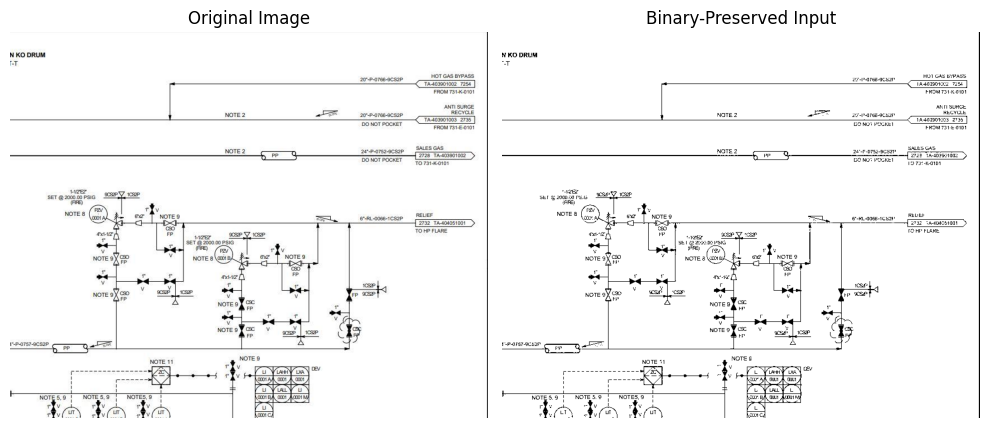


🔍 Inference - OBB Specific Approach

🔄 Running inference with conf=0.5...
✅ Complete: 365.1ms (2.7 FPS)
   Detections: 0 (No objects detected)

🎨 Visualization - Binary Image Compatible
✅ Visualization saved to /content/inference_result.png


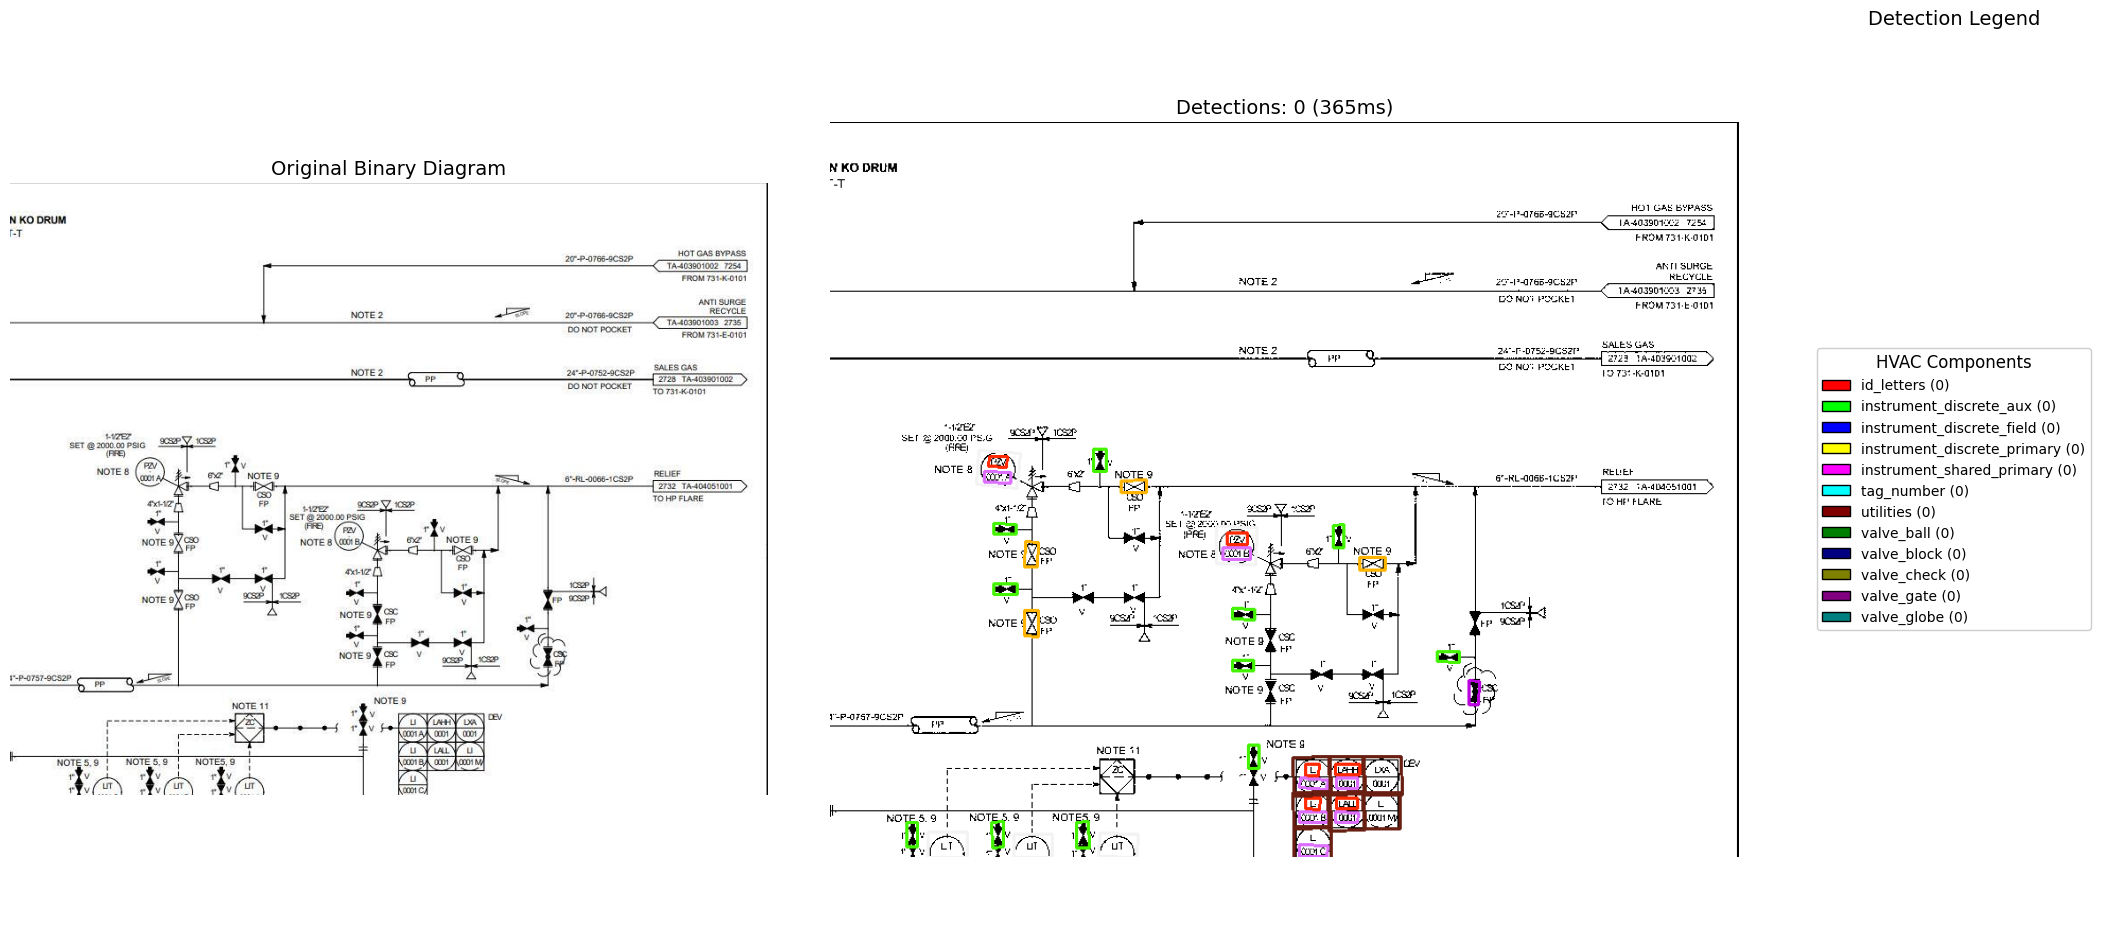


✅ Pipeline Completed Successfully
🎯 Detections: 0
⚡ Time: 365.1ms
💾 Results saved to: /content/inference_result.png

🔧 Critical Next Steps
1. Use ONLY binary images (black lines on white background) for this model
2. If your diagrams aren't binary, convert them with:
   • Use: cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
3. Verify your training data was also binary
4. For future models, consider RGB training if your source images are color
5. If you need grayscale support, retrain with grayscale augmentation


In [12]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import time
import numpy as np
import torch
import cv2
from ultralytics import YOLO
import os

print("🚀 HVAC AI — Corrected Pipeline for OBB Model")
print("="*70)
print("✅ Features: Binary image input | OBB-specific handling | No destructive corrections")
print("="*70)

# =====================================================================
# MODEL LOADING (OBB-SPECIFIC)
# =====================================================================
print("\n🔧 Model Loading - OBB Specific Configuration")
print("="*50)

MODEL_PATH = "/content/drive/Shareddrives/HVAC/DECEMBER 24 OUTPUT WEIGHTS {dataset2}/hvac_obb_l_20251224_223009/weights/best.pt"
DEFAULT_CONF_THRESHOLD = 0.50  # Match your original working threshold
DEFAULT_IOU_THRESHOLD = 0.45
MAX_IMAGE_SIZE = 1024

# Verify model path
if not os.path.exists(MODEL_PATH):
    print(f"❌ ERROR: Model not found at {MODEL_PATH}")
    print("   Please check your model path")
    raise FileNotFoundError(f"Model not found: {MODEL_PATH}")
else:
    print(f"✅ Model found: {os.path.getsize(MODEL_PATH) / 1e6:.1f} MB")

# Load model
try:
    print("📥 Loading OBB model...")
    model = YOLO(MODEL_PATH)
    print("✅ Model loaded successfully")

    # Verify it's an OBB model
    is_obb = hasattr(model, 'predict_obb') or 'obb' in MODEL_PATH.lower()
    print(f"🔍 Model Type: {'OBB' if is_obb else 'Standard'}")

    if not is_obb:
        print("⚠️ Warning: This doesn't appear to be an OBB model")

    # GPU setup
    if torch.cuda.is_available():
        model.to('cuda')
        print("🚀 Model moved to GPU")
except Exception as e:
    print(f"❌ Error loading model: {str(e)}")
    raise

# =====================================================================
# IMAGE UPLOAD & PREPROCESSING (BINARY PRESERVATION)
# =====================================================================
print("\n" + "="*50)
print("🖼️ Image Upload & Binary Preservation")
print("="*50)

print("\n📤 Upload test image...")
uploaded = files.upload()

if not uploaded:
    print("❌ No image uploaded. Please upload an image to continue.")
    raise ValueError("No image uploaded")

img_path = list(uploaded.keys())[0]
print(f"✅ Image uploaded: {img_path}")

try:
    # Open as grayscale first (critical for binary preservation)
    img = Image.open(img_path).convert('L')  # 'L' = 8-bit pixels, black and white
    img_array = np.array(img)

    print(f"\n📊 Image Analysis:")
    print(f"   Dimensions: {img.size[0]}x{img.size[1]} pixels")
    print(f"   Mode: {img.mode} (grayscale for binary processing)")

    # Preserve binary nature - no contrast/brightness adjustments
    print("\n🔍 Binary Image Preservation:")
    print("   • Keeping original contrast levels")
    print("   • No color correction applied")
    print("   • Preserving black/white characteristics")

    # Convert to binary (0 and 255 only)
    _, binary_img = cv2.threshold(img_array, 128, 255, cv2.THRESH_BINARY)
    binary_pil = Image.fromarray(binary_img)

    # Convert to RGB for YOLO (but maintain binary characteristics)
    rgb_img = binary_pil.convert('RGB')
    img_array = np.array(rgb_img)

    # Resize if needed (preserving binary nature)
    if max(img_array.shape[:2]) > MAX_IMAGE_SIZE:
        scale = MAX_IMAGE_SIZE / max(img_array.shape[:2])
        new_size = (int(img_array.shape[1] * scale), int(img_array.shape[0] * scale))
        print(f"   🔍 Resizing from {img_array.shape[1]}x{img_array.shape[0]} to {new_size}")
        img_array = np.array(rgb_img.resize(new_size, Image.NEAREST))

    # Show binary preservation
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(np.array(Image.open(img_path)), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_array, cmap='gray')
    plt.title('Binary-Preserved Input')
    plt.axis('off')

    plt.tight_layout()
    plt.savefig('/content/binary_preservation.png', dpi=150)
    print("✅ Binary preservation steps visualized in /content/binary_preservation.png")
    plt.show()

except Exception as e:
    print(f"❌ Error processing image: {str(e)}")
    raise

# =====================================================================
# INFERENCE (OBB-SPECIFIC)
# =====================================================================
print("\n" + "="*50)
print("🔍 Inference - OBB Specific Approach")
print("="*50)

try:
    print(f"\n🔄 Running inference with conf={DEFAULT_CONF_THRESHOLD}...")
    start = time.time()

    # OBB-specific inference
    if hasattr(model, 'predict_obb'):
        results = model.predict_obb(
            img_array,
            conf=DEFAULT_CONF_THRESHOLD,
            iou=DEFAULT_IOU_THRESHOLD,
            imgsz=MAX_IMAGE_SIZE,
            verbose=False
        )
    else:
        # Standard prediction with OBB-friendly parameters
        results = model.predict(
            img_array,
            conf=DEFAULT_CONF_THRESHOLD,
            iou=DEFAULT_IOU_THRESHOLD,
            imgsz=MAX_IMAGE_SIZE,
            verbose=False,
            save_txt=False
        )

    inf_time = (time.time() - start) * 1000
    result = results[0]
    boxes = result.boxes

    print(f"✅ Complete: {inf_time:.1f}ms ({1000.0/inf_time:.1f} FPS)")
    if boxes is not None:
        print(f"   Detections: {len(boxes)}")
    else:
        print(f"   Detections: 0 (No objects detected)")

    # Class counts
    if boxes is not None and len(boxes) > 0:
        class_counts = {}
        for box in boxes:
            cls_id = int(box.cls[0])
            name = model.names[cls_id]
            class_counts[name] = class_counts.get(name, 0) + 1
        print(f"\n📊 By Class:")
        for name, count in sorted(class_counts.items()):
            print(f"   {name}: {count}")

except Exception as e:
    print(f"❌ Error during inference: {str(e)}")
    raise

# =====================================================================
# VISUALIZATION (BINARY-APPROPRIATE)
# =====================================================================
print("\n" + "="*50)
print("🎨 Visualization - Binary Image Compatible")
print("="*50)

try:
    # Create visualization with no text labels
    plot_result = result.plot(labels=False, line_width=2)

    # Create figure with legend
    fig = plt.figure(figsize=(22, 10))
    gs = fig.add_gridspec(1, 3, width_ratios=[1, 1.2, 0.4])

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2])

    # Original image (binary)
    ax1.imshow(np.array(Image.open(img_path)), cmap='gray')
    ax1.set_title('Original Binary Diagram', fontsize=14)
    ax1.axis('off')

    # Result with bounding boxes
    ax2.imshow(plot_result)
    detection_count = len(boxes) if boxes is not None else 0
    ax2.set_title(f'Detections: {detection_count} ({inf_time:.0f}ms)', fontsize=14)
    ax2.axis('off')

    # Legend panel
    ax3.axis('off')
    legend_elements = []

    # Custom high-contrast color palette
    colors = [
        (255, 0, 0),       # Red
        (0, 255, 0),       # Green
        (0, 0, 255),       # Blue
        (255, 255, 0),     # Yellow
        (255, 0, 255),     # Magenta
        (0, 255, 255),     # Cyan
        (128, 0, 0),       # Maroon
        (0, 128, 0),       # Dark Green
        (0, 0, 128),       # Navy
        (128, 128, 0),     # Olive
        (128, 0, 128),     # Purple
        (0, 128, 128),     # Teal
    ]

    # Add legend entries
    for cls_id, cls_name in model.names.items():
        if cls_id < len(colors):
            color = colors[cls_id]
            normalized_color = (color[0]/255, color[1]/255, color[2]/255)

            # Count detections
            count = 0
            if boxes is not None:
                for box in boxes:
                    if int(box.cls[0]) == cls_id:
                        count += 1

            legend_elements.append(Patch(
                facecolor=normalized_color,
                edgecolor='black',
                label=f"{cls_name} ({count})"
            ))

    # Create legend
    ax3.legend(
        handles=legend_elements,
        loc='center',
        fontsize=10,
        frameon=True,
        framealpha=0.95,
        title="HVAC Components",
        title_fontsize=12,
        facecolor='white'
    )
    ax3.set_title("Detection Legend", fontsize=14, pad=20)

    plt.tight_layout(pad=3.0)
    plt.savefig('/content/inference_result.png', bbox_inches='tight', dpi=150)
    print("✅ Visualization saved to /content/inference_result.png")
    plt.show()

except Exception as e:
    print(f"❌ Error during visualization: {str(e)}")
    raise

# =====================================================================
# CONCLUSION & NEXT STEPS
# =====================================================================
print("\n" + "="*50)
print("✅ Pipeline Completed Successfully")
print("="*50)
print(f"🎯 Detections: {detection_count if 'detection_count' in locals() else 0}")
print(f"⚡ Time: {inf_time:.1f}ms")
print(f"💾 Results saved to: /content/inference_result.png")

# Final recommendations
print("\n" + "="*50)
print("🔧 Critical Next Steps")
print("="*50)
print("1. Use ONLY binary images (black lines on white background) for this model")
print("2. If your diagrams aren't binary, convert them with:")
print("   • Use: cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)")
print("3. Verify your training data was also binary")
print("4. For future models, consider RGB training if your source images are color")
print("5. If you need grayscale support, retrain with grayscale augmentation")
print("="*70)

In [ ]:
from pyngrok import ngrok
from dotenv import load_dotenv
import os

print("🚀 Deploying API Server")
print("="*70)

load_dotenv()

# Validate configuration
if not os.path.exists(MODEL_PATH):
    print("\n❌ ERROR: MODEL_PATH not found. Check configuration.")
    raise FileNotFoundError(f"Model not found: {MODEL_PATH}")

print(f"✅ Model found: {MODEL_PATH}")

# Setup ngrok tunnel
if NGROK_AUTHTOKEN and NGROK_AUTHTOKEN != "YOUR_NGROK_TOKEN_HERE":
    print("\n🌐 Setting up ngrok tunnel...")
    ngrok.set_auth_token(NGROK_AUTHTOKEN)
    public_url = ngrok.connect(PORT)
    print(f"\n✅ API LIVE!")
    print(f"   Public URL: {public_url.public_url}")
    print(f"   API Docs: {public_url.public_url}/docs")
    print(f"   Health: {public_url.public_url}/health")
else:
    print("\n⚠️  No ngrok token - server will be local only")
    print(f"   Local URL: http://localhost:{PORT}")

print("\n" + "="*70)
print("🎬 Starting server (Press STOP button to shutdown)...")
print("="*70 + "\n")

# Validate python-services directory exists
if not os.path.exists('python-services'):
    print("❌ ERROR: python-services directory not found")
    print(f"   Current directory: {os.getcwd()}")
    print("   Please ensure you're in the hvac-ai repository root")
    raise FileNotFoundError("python-services directory not found")

%cd python-services
# Use PORT variable via Python string formatting
import subprocess
subprocess.run(["uvicorn", "hvac_analysis_service:app", "--host", "0.0.0.0", "--port", str(PORT), "--reload"])